In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Introduction to the dataset
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases.

Half the deaths in the United States and other developed countries are due to cardio vascular diseases.

The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.

This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

#### Data Preparation
The dataset is publically available and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

## Variables :

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

 - **Demographic:**
sex: male or female;(Nominal)

    -  age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)


 - **Behavioural**

    -  currentSmoker: whether or not the patient is a current smoker (Nominal)

    -  cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

 - **Medical( history):**

    -  BPMeds: whether or not the patient was on blood pressure medication (Nominal)

    -  prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

    -  prevalentHyp: whether or not the patient was hypertensive (Nominal)

    -  diabetes: whether or not the patient had diabetes (Nominal)

 - **Medical(current):** 

    -  totChol: total cholesterol level (Continuous)

    -  sysBP: systolic blood pressure (Continuous)

    -  diaBP: diastolic blood pressure (Continuous)

    -  BMI: Body Mass Index (Continuous)

    -  heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

    -  glucose: glucose level (Continuous)


 - **Predict variable (desired target):**

    -  10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


In [23]:
data=pd.read_csv("US_Heart_Patients.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [24]:
data.shape

(4240, 16)

## outcome variable is
what is 10 year risk of cardio vascular diseases which 1 is risk 0 is no risk

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [26]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [27]:
data.rename(columns={'male':'gender'},inplace=True)

In [28]:
data1=data.dropna()

In [29]:
data1.shape

(3658, 16)

In [30]:
data.shape[0]-data1.shape[0]

582

In [37]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(data.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


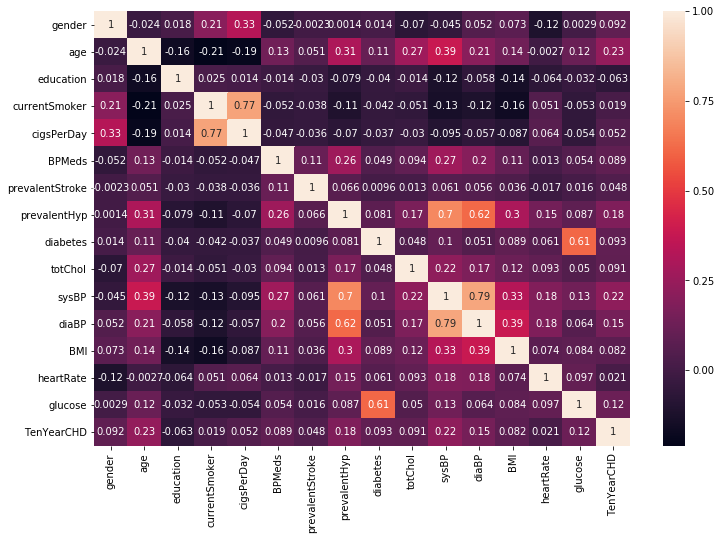

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(data1.corr(),annot=True)

In [38]:
data1.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [41]:
x=data1.drop("TenYearCHD",axis=1)
y=data1["TenYearCHD"]

In [43]:
print(x.shape)
print(type(y))

(3658, 15)
<class 'pandas.core.series.Series'>


## <font color=RoyalBlue>Logistic Regression<font>

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success. 

#### adding constant to the x variable

In [44]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(data1)
df_constant.head()

C:\Users\vikhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [68]:
cols=df_constant.columns[:-1]
model=sm.Logit(data1.TenYearCHD,df_constant[cols])#y,x
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Wed, 08 Apr 2020   Pseudo R-squ.:                  0.1175
Time:                        18:38:47   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
gender              0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

In [77]:
Largest=round(result.pvalues,3).nlargest(10)

In [78]:
print(Largest.index)

Index(['diabetes', 'currentSmoker', 'BMI', 'diaBP', 'BPMeds', 'heartRate',
       'education', 'prevalentStroke', 'prevalentHyp', 'totChol'],
      dtype='object')


#### HERE BASED ON P_VALUE WE GONNA REMOVE THE COLUMNS WHERE P_vALUE>0.05 WE SHOULD REMOVE THE FEATURE

# Feature Selection: Backward elemination (P-value approach)

In [130]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eliminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.03):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df_constant,data1.TenYearCHD,cols)

In [131]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3652
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Apr 2020   Pseudo R-squ.:                  0.1135
Time:                        20:55:55   Log-Likelihood:                -1383.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.041e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7081      0.421    -20.682      0.000      -9.533      -7.883
gender         0.5312      0.106      5.032      0.000       0.324       0.738
age            0.0674      0.006     10.574      0.000       0.055       0.080
cigsPerDay     0.0195      0.004      4.683      0.000       0.011       0.028
sysBP          0.0180      0.002      8.413      0.000       0.014       0.022
glucose        0.0073      0.002      4.369      0.000       0.004       0.011
==============================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing  low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time follwed by  running the regression repeatedly until all attributes have P Values less than 0.05.



#### <font color=darkblue>Logistic regression equation<font>

$$P=\hspace{.2cm}e^{\beta_0 + \beta_1 X_1}\hspace{.2cm}/\hspace{.2cm}1+e^{\beta_0 +\beta_1 X_1}$$

When all features plugged in:

$$logit(p) = log(p/(1-p))=\beta_0 +\beta_1\hspace{.1cm} *\hspace{.2cm} gender\hspace{.2cm}+\beta_2\hspace{.1cm} * \hspace{.1cm}age\hspace{.2cm}+\hspace{.2cm}\beta_3\hspace{.1cm} *\hspace{.1cm} cigsPerDay\hspace{.2cm}+\hspace{.2cm}\beta_4 \hspace{.1cm}*\hspace{.1cm} totChol\hspace{.2cm}+\hspace{.2cm}\beta_5\hspace{.1cm} *\hspace{.1cm} sysBP\hspace{.2cm}+\hspace{.2cm}\beta_6\hspace{.1cm} *\hspace{.1cm} glucose\hspace{.2cm}$$



## Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues

In [81]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))


            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000042       0.000274    0.000108   0.000
gender          1.422325       2.161998    1.753586   0.000
age             1.054823       1.081727    1.068190   0.000
cigsPerDay      1.011106       1.027788    1.019413   0.000
totChol         1.000080       1.004491    1.002283   0.042
sysBP           1.013404       1.021977    1.017682   0.000
glucose         1.004004       1.010626    1.007310   0.000


In [133]:
 np.exp(result.params)

const         0.000165
gender        1.700892
age           1.069698
cigsPerDay    1.019712
sysBP         1.018150
glucose       1.007332
dtype: float64

 - **This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (gender = 1)over that of  females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that the odds for males are 78.8% higher than the odds for females.**
<br>
<br>

 - **The coefficient for age says that, holding all others constant, we will see 7% increase in the odds of getting diagnosed with CDH for a one year increase in age since exp(0.0655) = 1.067644.**
<br>
<br>
 - **Similarly , with every extra cigarette one smokes thers is a 2% increase in the odds of CDH.** 
<br>
<br>
 - **For Total cholosterol level and glucose level there is no significant change.**
<br>
<br>
 - **There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.**


## scikit logit

In [120]:
x_final=data1[['age','gender','cigsPerDay','sysBP','glucose']]
y=data1['TenYearCHD']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=.30,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2560, 5) (2560,)
(1098, 5) (1098,)


In [121]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\vikhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [122]:
from sklearn import metrics

## Model Evaluation

## Model accuracy

In [123]:
acc=metrics.accuracy_score(y_test,y_pred)
print(acc*100)

83.7887067395264


In [124]:
y_test.value_counts()  # here we are testing 916 are healthy and 182 are discease

0    916
1    182
Name: TenYearCHD, dtype: int64

### Confusion matrix

In [125]:
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[913   3]
 [175   7]]


In [126]:
tpr=cm[1,1]/cm[1,:].sum()#sensitivity
tpr*100

3.8461538461538463

In [127]:
fpr=cm[0,0]/cm[0,:].sum()#specificity
fpr*100

99.67248908296943

In [128]:
np.round(model.coef_,4)

array([[0.0425, 0.4553, 0.0135, 0.0149, 0.0067]])

In [129]:
x_final.columns

Index(['age', 'gender', 'cigsPerDay', 'sysBP', 'glucose'], dtype='object')

###### by droping totChol i should not affect the model it act as retunduant by seeing coeff